## Multiple linear regression(MLR) Stochastic Gradient Descent(SGD),
### with optuna and StandardScaler
on subsampled dataset with 3fold un shuffled cv
20220927

In [1]:
import pandas as pd
import numpy as np
import random
import optuna as opt
import time
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline

In [2]:
#import data
train_df = pd.read_parquet("train_main.parquet.snappy")
test_df = pd.read_parquet("test_main.parquet.snappy")
test_df

,r_id,r_stars,r_stars_square,r_length,u_friends_count,u_review_count,u_month_age,b_stars,b_review_count,r_sen,r_sub,r_rea,r_useful
0,4195320,4,16,86,163,40,27.298941,4.0,445,0.117031,0.361875,86.10,1
1,4406379,5,25,28,18,115,0.001011,4.0,636,-0.140000,0.133333,96.48,3
2,1172072,5,25,76,69,1,0.000002,2.5,15,0.256723,0.355398,69.07,1
3,1949778,1,1,186,23,6,23.288288,3.5,185,-0.209252,0.378994,82.54,1
4,4377517,5,25,57,1,25,48.728723,4.5,227,0.295040,0.454762,91.11,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,5373252,5,25,25,288,2,24.026242,3.5,117,0.775000,0.662500,64.04,1
99996,4500278,5,25,76,21,59,44.444338,4.0,532,0.325664,0.561008,71.48,1
99997,4981139,5,25,65,236,143,4.868817,4.0,7568,0.097821,0.502692,83.66,2
99998,3032513,1,1,33,2,28,0.002720,3.0,80,0.300000,0.306250,100.04,3


In [3]:
X_train = train_df.drop(['r_id','r_useful'],axis=1)
y_train = train_df['r_useful']
X_test = test_df.drop(['r_id','r_useful'],axis=1)
y_test = test_df['r_useful']

In [4]:
random.seed(760)

In [5]:
def objective(trial):
    start = time.time()
    params = {
        "alpha": trial.suggest_float('alpha', 0.00001, 0.005),
        "eta0": trial.suggest_float('eta0', 0.005, 0.1),
        "power_t": trial.suggest_float('power_t', 0.1, 0.5),
        "learning_rate" : trial.suggest_categorical("learning_rate", ['constant', 'optimal', 'invscaling', 'adaptive']),
    }
    print("Currently running with:")
    print(params)
    
    model = SGDRegressor(**params)
    pipe = make_pipeline(StandardScaler(), model)
    
    # model.fit(X_train, y_train)
    cvscore = np.sqrt(-np.mean(cross_val_score(pipe, X_train, y_train, scoring = "neg_mean_squared_error", cv=3)))
    # y_pred = model.predict(X_val)
    print("Time cost:", time.time()-start)
    # return mean_squared_error(y_val, y_pred, squared=False)
    return cvscore

In [6]:
study = opt.create_study(direction = 'minimize')
study.optimize(objective, n_trials = 50)
study.best_params

[I 2022-09-30 19:10:28,629] A new study created in memory with name: no-name-97be952a-9dcf-460f-ab0b-68cc61cfef33


Currently running with:
{'alpha': 0.0023735246057542446, 'eta0': 0.09733128411230535, 'power_t': 0.1503521337382667, 'learning_rate': 'optimal'}


[I 2022-09-30 19:10:30,356] Trial 0 finished with value: 3.811365864495445 and parameters: {'alpha': 0.0023735246057542446, 'eta0': 0.09733128411230535, 'power_t': 0.1503521337382667, 'learning_rate': 'optimal'}. Best is trial 0 with value: 3.811365864495445.


Time cost: 1.7249977588653564
Currently running with:
{'alpha': 0.004969887245317473, 'eta0': 0.05666339709148893, 'power_t': 0.4482867033818969, 'learning_rate': 'invscaling'}


[I 2022-09-30 19:10:31,598] Trial 1 finished with value: 3.8123673938219507 and parameters: {'alpha': 0.004969887245317473, 'eta0': 0.05666339709148893, 'power_t': 0.4482867033818969, 'learning_rate': 'invscaling'}. Best is trial 0 with value: 3.811365864495445.


Time cost: 1.2410013675689697
Currently running with:
{'alpha': 0.0019350561495570927, 'eta0': 0.09798993229063857, 'power_t': 0.17629085558224944, 'learning_rate': 'invscaling'}


[I 2022-09-30 19:10:33,699] Trial 2 finished with value: 3.982576205939738 and parameters: {'alpha': 0.0019350561495570927, 'eta0': 0.09798993229063857, 'power_t': 0.17629085558224944, 'learning_rate': 'invscaling'}. Best is trial 0 with value: 3.811365864495445.


Time cost: 2.100001096725464
Currently running with:
{'alpha': 0.0009709513059068512, 'eta0': 0.0675226558167289, 'power_t': 0.1465088811728512, 'learning_rate': 'invscaling'}


[I 2022-09-30 19:10:36,207] Trial 3 finished with value: 3.986077567299359 and parameters: {'alpha': 0.0009709513059068512, 'eta0': 0.0675226558167289, 'power_t': 0.1465088811728512, 'learning_rate': 'invscaling'}. Best is trial 0 with value: 3.811365864495445.


Time cost: 2.508043050765991
Currently running with:
{'alpha': 0.001569264149338265, 'eta0': 0.05728093188246178, 'power_t': 0.4930904270069295, 'learning_rate': 'invscaling'}


[I 2022-09-30 19:10:37,817] Trial 4 finished with value: 3.8106601205189583 and parameters: {'alpha': 0.001569264149338265, 'eta0': 0.05728093188246178, 'power_t': 0.4930904270069295, 'learning_rate': 'invscaling'}. Best is trial 4 with value: 3.8106601205189583.


Time cost: 1.6090006828308105
Currently running with:
{'alpha': 0.0014228052055957386, 'eta0': 0.08682191920650685, 'power_t': 0.32577174740981074, 'learning_rate': 'optimal'}


[I 2022-09-30 19:10:40,773] Trial 5 finished with value: 3.8120117110316087 and parameters: {'alpha': 0.0014228052055957386, 'eta0': 0.08682191920650685, 'power_t': 0.32577174740981074, 'learning_rate': 'optimal'}. Best is trial 4 with value: 3.8106601205189583.


Time cost: 2.955047369003296
Currently running with:
{'alpha': 0.0001917435858073897, 'eta0': 0.02522580866907971, 'power_t': 0.34687803791938726, 'learning_rate': 'constant'}


[I 2022-09-30 19:10:41,741] Trial 6 finished with value: 4.175456859016824 and parameters: {'alpha': 0.0001917435858073897, 'eta0': 0.02522580866907971, 'power_t': 0.34687803791938726, 'learning_rate': 'constant'}. Best is trial 4 with value: 3.8106601205189583.


Time cost: 0.9670004844665527
Currently running with:
{'alpha': 0.0026184985056626735, 'eta0': 0.0706580134525886, 'power_t': 0.4067468364480423, 'learning_rate': 'invscaling'}


[I 2022-09-30 19:10:44,184] Trial 7 finished with value: 3.8133881753534413 and parameters: {'alpha': 0.0026184985056626735, 'eta0': 0.0706580134525886, 'power_t': 0.4067468364480423, 'learning_rate': 'invscaling'}. Best is trial 4 with value: 3.8106601205189583.


Time cost: 2.4429988861083984
Currently running with:
{'alpha': 0.004246082264479113, 'eta0': 0.07705201394908123, 'power_t': 0.1317532962560383, 'learning_rate': 'adaptive'}


[I 2022-09-30 19:10:50,168] Trial 8 finished with value: 3.8104509960948474 and parameters: {'alpha': 0.004246082264479113, 'eta0': 0.07705201394908123, 'power_t': 0.1317532962560383, 'learning_rate': 'adaptive'}. Best is trial 8 with value: 3.8104509960948474.


Time cost: 5.983000755310059
Currently running with:
{'alpha': 0.004796584062556008, 'eta0': 0.026104584685636235, 'power_t': 0.4809337882345779, 'learning_rate': 'optimal'}


[I 2022-09-30 19:10:51,817] Trial 9 finished with value: 3.8115895870833465 and parameters: {'alpha': 0.004796584062556008, 'eta0': 0.026104584685636235, 'power_t': 0.4809337882345779, 'learning_rate': 'optimal'}. Best is trial 8 with value: 3.8104509960948474.


Time cost: 1.6480493545532227
Currently running with:
{'alpha': 0.0037263465304587665, 'eta0': 0.04097174684841561, 'power_t': 0.23776028134577298, 'learning_rate': 'adaptive'}


[I 2022-09-30 19:10:56,683] Trial 10 finished with value: 3.8103775045692676 and parameters: {'alpha': 0.0037263465304587665, 'eta0': 0.04097174684841561, 'power_t': 0.23776028134577298, 'learning_rate': 'adaptive'}. Best is trial 10 with value: 3.8103775045692676.


Time cost: 4.86409592628479
Currently running with:
{'alpha': 0.0036973896658959024, 'eta0': 0.03912069585709113, 'power_t': 0.2390120977403089, 'learning_rate': 'adaptive'}


[I 2022-09-30 19:11:01,666] Trial 11 finished with value: 3.8103615156037587 and parameters: {'alpha': 0.0036973896658959024, 'eta0': 0.03912069585709113, 'power_t': 0.2390120977403089, 'learning_rate': 'adaptive'}. Best is trial 11 with value: 3.8103615156037587.


Time cost: 4.982046127319336
Currently running with:
{'alpha': 0.0035530389277502773, 'eta0': 0.038733333552272174, 'power_t': 0.24238379035417842, 'learning_rate': 'adaptive'}


[I 2022-09-30 19:11:06,869] Trial 12 finished with value: 3.810362427260658 and parameters: {'alpha': 0.0035530389277502773, 'eta0': 0.038733333552272174, 'power_t': 0.24238379035417842, 'learning_rate': 'adaptive'}. Best is trial 11 with value: 3.8103615156037587.


Time cost: 5.203000068664551
Currently running with:
{'alpha': 0.0032632538692572016, 'eta0': 0.039699250380646346, 'power_t': 0.2424544901038123, 'learning_rate': 'adaptive'}


[I 2022-09-30 19:11:12,192] Trial 13 finished with value: 3.8103169096948815 and parameters: {'alpha': 0.0032632538692572016, 'eta0': 0.039699250380646346, 'power_t': 0.2424544901038123, 'learning_rate': 'adaptive'}. Best is trial 13 with value: 3.8103169096948815.


Time cost: 5.322144985198975
Currently running with:
{'alpha': 0.0032391491957162693, 'eta0': 0.006195601691943192, 'power_t': 0.2520590985369289, 'learning_rate': 'adaptive'}


[I 2022-09-30 19:11:16,959] Trial 14 finished with value: 3.8103032059588666 and parameters: {'alpha': 0.0032391491957162693, 'eta0': 0.006195601691943192, 'power_t': 0.2520590985369289, 'learning_rate': 'adaptive'}. Best is trial 14 with value: 3.8103032059588666.


Time cost: 4.764998435974121
Currently running with:
{'alpha': 0.002947504763058355, 'eta0': 0.005627395536122383, 'power_t': 0.2696982095678011, 'learning_rate': 'adaptive'}


[I 2022-09-30 19:11:20,738] Trial 15 finished with value: 3.8102459352107068 and parameters: {'alpha': 0.002947504763058355, 'eta0': 0.005627395536122383, 'power_t': 0.2696982095678011, 'learning_rate': 'adaptive'}. Best is trial 15 with value: 3.8102459352107068.


Time cost: 3.777998924255371
Currently running with:
{'alpha': 0.002892867762707617, 'eta0': 0.006329954336120616, 'power_t': 0.28877342256005656, 'learning_rate': 'constant'}


[I 2022-09-30 19:11:21,994] Trial 16 finished with value: 4.093584470506525 and parameters: {'alpha': 0.002892867762707617, 'eta0': 0.006329954336120616, 'power_t': 0.28877342256005656, 'learning_rate': 'constant'}. Best is trial 15 with value: 3.8102459352107068.


Time cost: 1.2559990882873535
Currently running with:
{'alpha': 0.004223544572901145, 'eta0': 0.0073808659423707885, 'power_t': 0.37338218475344925, 'learning_rate': 'adaptive'}


[I 2022-09-30 19:11:26,230] Trial 17 finished with value: 3.8104508383470423 and parameters: {'alpha': 0.004223544572901145, 'eta0': 0.0073808659423707885, 'power_t': 0.37338218475344925, 'learning_rate': 'adaptive'}. Best is trial 15 with value: 3.8102459352107068.


Time cost: 4.2340004444122314
Currently running with:
{'alpha': 0.0030928590137539705, 'eta0': 0.017936693630455455, 'power_t': 0.3036618174157849, 'learning_rate': 'adaptive'}


[I 2022-09-30 19:11:31,045] Trial 18 finished with value: 3.8102902191477543 and parameters: {'alpha': 0.0030928590137539705, 'eta0': 0.017936693630455455, 'power_t': 0.3036618174157849, 'learning_rate': 'adaptive'}. Best is trial 15 with value: 3.8102459352107068.


Time cost: 4.813999176025391
Currently running with:
{'alpha': 0.0022556908985325442, 'eta0': 0.017967074956689207, 'power_t': 0.2981974979822599, 'learning_rate': 'adaptive'}


[I 2022-09-30 19:11:36,306] Trial 19 finished with value: 3.810208626637869 and parameters: {'alpha': 0.0022556908985325442, 'eta0': 0.017967074956689207, 'power_t': 0.2981974979822599, 'learning_rate': 'adaptive'}. Best is trial 19 with value: 3.810208626637869.


Time cost: 5.261001348495483
Currently running with:
{'alpha': 0.002156237817848848, 'eta0': 0.0183846478257986, 'power_t': 0.19770028973090376, 'learning_rate': 'constant'}


[I 2022-09-30 19:11:37,601] Trial 20 finished with value: 7.652109557320821 and parameters: {'alpha': 0.002156237817848848, 'eta0': 0.0183846478257986, 'power_t': 0.19770028973090376, 'learning_rate': 'constant'}. Best is trial 19 with value: 3.810208626637869.


Time cost: 1.2929987907409668
Currently running with:
{'alpha': 0.002800154388307271, 'eta0': 0.018076221409965926, 'power_t': 0.29896989071404184, 'learning_rate': 'adaptive'}


[I 2022-09-30 19:11:42,330] Trial 21 finished with value: 3.810235549033766 and parameters: {'alpha': 0.002800154388307271, 'eta0': 0.018076221409965926, 'power_t': 0.29896989071404184, 'learning_rate': 'adaptive'}. Best is trial 19 with value: 3.810208626637869.


Time cost: 4.729000568389893
Currently running with:
{'alpha': 0.002757905532537319, 'eta0': 0.018473416517391057, 'power_t': 0.2835830946117242, 'learning_rate': 'adaptive'}


[I 2022-09-30 19:11:46,562] Trial 22 finished with value: 3.81023461962592 and parameters: {'alpha': 0.002757905532537319, 'eta0': 0.018473416517391057, 'power_t': 0.2835830946117242, 'learning_rate': 'adaptive'}. Best is trial 19 with value: 3.810208626637869.


Time cost: 4.231148958206177
Currently running with:
{'alpha': 0.0018509434357032713, 'eta0': 0.029139973276651177, 'power_t': 0.37407237371270957, 'learning_rate': 'adaptive'}


[I 2022-09-30 19:11:51,761] Trial 23 finished with value: 3.8101065153033886 and parameters: {'alpha': 0.0018509434357032713, 'eta0': 0.029139973276651177, 'power_t': 0.37407237371270957, 'learning_rate': 'adaptive'}. Best is trial 23 with value: 3.8101065153033886.


Time cost: 5.196998119354248
Currently running with:
{'alpha': 0.0010376840780983872, 'eta0': 0.025477486312702163, 'power_t': 0.39119166033764047, 'learning_rate': 'adaptive'}


[I 2022-09-30 19:11:56,408] Trial 24 finished with value: 3.8100616337440236 and parameters: {'alpha': 0.0010376840780983872, 'eta0': 0.025477486312702163, 'power_t': 0.39119166033764047, 'learning_rate': 'adaptive'}. Best is trial 24 with value: 3.8100616337440236.


Time cost: 4.647001266479492
Currently running with:
{'alpha': 0.0006919298221874935, 'eta0': 0.030286052912284294, 'power_t': 0.40365329567537894, 'learning_rate': 'adaptive'}


[I 2022-09-30 19:12:02,212] Trial 25 finished with value: 3.810024135182614 and parameters: {'alpha': 0.0006919298221874935, 'eta0': 0.030286052912284294, 'power_t': 0.40365329567537894, 'learning_rate': 'adaptive'}. Best is trial 25 with value: 3.810024135182614.


Time cost: 5.804048538208008
Currently running with:
{'alpha': 0.0003910924920211014, 'eta0': 0.029238689881671734, 'power_t': 0.4040602257664556, 'learning_rate': 'adaptive'}


[I 2022-09-30 19:12:07,414] Trial 26 finished with value: 3.810025822606776 and parameters: {'alpha': 0.0003910924920211014, 'eta0': 0.029238689881671734, 'power_t': 0.4040602257664556, 'learning_rate': 'adaptive'}. Best is trial 25 with value: 3.810024135182614.


Time cost: 5.201000928878784
Currently running with:
{'alpha': 1.1476835085270747e-05, 'eta0': 0.04860747849614859, 'power_t': 0.42774278244631747, 'learning_rate': 'adaptive'}


[I 2022-09-30 19:12:12,080] Trial 27 finished with value: 3.8100209856936296 and parameters: {'alpha': 1.1476835085270747e-05, 'eta0': 0.04860747849614859, 'power_t': 0.42774278244631747, 'learning_rate': 'adaptive'}. Best is trial 27 with value: 3.8100209856936296.


Time cost: 4.665198087692261
Currently running with:
{'alpha': 0.00020546736823817734, 'eta0': 0.05013410612908265, 'power_t': 0.43874177749895904, 'learning_rate': 'optimal'}


[I 2022-09-30 19:12:16,979] Trial 28 finished with value: 3.813796654942239 and parameters: {'alpha': 0.00020546736823817734, 'eta0': 0.05013410612908265, 'power_t': 0.43874177749895904, 'learning_rate': 'optimal'}. Best is trial 27 with value: 3.8100209856936296.


Time cost: 4.898147106170654
Currently running with:
{'alpha': 0.0005084331215804354, 'eta0': 0.04816128663456677, 'power_t': 0.42290519990692527, 'learning_rate': 'constant'}


[I 2022-09-30 19:12:17,986] Trial 29 finished with value: 368143.1206509969 and parameters: {'alpha': 0.0005084331215804354, 'eta0': 0.04816128663456677, 'power_t': 0.42290519990692527, 'learning_rate': 'constant'}. Best is trial 27 with value: 3.8100209856936296.


Time cost: 1.0060522556304932
Currently running with:
{'alpha': 0.0008182405411965715, 'eta0': 0.03257253228568421, 'power_t': 0.46368355609285233, 'learning_rate': 'optimal'}


[I 2022-09-30 19:12:20,734] Trial 30 finished with value: 3.813865011166823 and parameters: {'alpha': 0.0008182405411965715, 'eta0': 0.03257253228568421, 'power_t': 0.46368355609285233, 'learning_rate': 'optimal'}. Best is trial 27 with value: 3.8100209856936296.


Time cost: 2.747000217437744
Currently running with:
{'alpha': 0.0009790727178892495, 'eta0': 0.032075800067157344, 'power_t': 0.39828230472296355, 'learning_rate': 'adaptive'}


[I 2022-09-30 19:12:26,464] Trial 31 finished with value: 3.810049553379792 and parameters: {'alpha': 0.0009790727178892495, 'eta0': 0.032075800067157344, 'power_t': 0.39828230472296355, 'learning_rate': 'adaptive'}. Best is trial 27 with value: 3.8100209856936296.


Time cost: 5.728564023971558
Currently running with:
{'alpha': 0.0005440417150174662, 'eta0': 0.033212992734761616, 'power_t': 0.4091341401357147, 'learning_rate': 'adaptive'}


[I 2022-09-30 19:12:31,711] Trial 32 finished with value: 3.810030302831512 and parameters: {'alpha': 0.0005440417150174662, 'eta0': 0.033212992734761616, 'power_t': 0.4091341401357147, 'learning_rate': 'adaptive'}. Best is trial 27 with value: 3.8100209856936296.


Time cost: 5.245999574661255
Currently running with:
{'alpha': 0.0006104113853519437, 'eta0': 0.04579485936508879, 'power_t': 0.4506046923942704, 'learning_rate': 'adaptive'}


[I 2022-09-30 19:12:36,603] Trial 33 finished with value: 3.8100225033168624 and parameters: {'alpha': 0.0006104113853519437, 'eta0': 0.04579485936508879, 'power_t': 0.4506046923942704, 'learning_rate': 'adaptive'}. Best is trial 27 with value: 3.8100209856936296.


Time cost: 4.8912413120269775
Currently running with:
{'alpha': 9.838686550410125e-05, 'eta0': 0.05723801399573817, 'power_t': 0.45049185913787376, 'learning_rate': 'adaptive'}


[I 2022-09-30 19:12:41,657] Trial 34 finished with value: 3.810005473445607 and parameters: {'alpha': 9.838686550410125e-05, 'eta0': 0.05723801399573817, 'power_t': 0.45049185913787376, 'learning_rate': 'adaptive'}. Best is trial 34 with value: 3.810005473445607.


Time cost: 5.053328514099121
Currently running with:
{'alpha': 6.136879480172366e-05, 'eta0': 0.056338078779123155, 'power_t': 0.45684773284386276, 'learning_rate': 'invscaling'}


[I 2022-09-30 19:12:43,283] Trial 35 finished with value: 3.8121786909491036 and parameters: {'alpha': 6.136879480172366e-05, 'eta0': 0.056338078779123155, 'power_t': 0.45684773284386276, 'learning_rate': 'invscaling'}. Best is trial 34 with value: 3.810005473445607.


Time cost: 1.624098300933838
Currently running with:
{'alpha': 0.0007732371981956224, 'eta0': 0.062213071165176985, 'power_t': 0.49957217658730546, 'learning_rate': 'adaptive'}


[I 2022-09-30 19:12:48,372] Trial 36 finished with value: 3.8100298438855797 and parameters: {'alpha': 0.0007732371981956224, 'eta0': 0.062213071165176985, 'power_t': 0.49957217658730546, 'learning_rate': 'adaptive'}. Best is trial 34 with value: 3.810005473445607.


Time cost: 5.089048624038696
Currently running with:
{'alpha': 0.0012225777214573642, 'eta0': 0.06326960788968748, 'power_t': 0.4378712376662159, 'learning_rate': 'adaptive'}


[I 2022-09-30 19:12:53,889] Trial 37 finished with value: 3.8100904520960865 and parameters: {'alpha': 0.0012225777214573642, 'eta0': 0.06326960788968748, 'power_t': 0.4378712376662159, 'learning_rate': 'adaptive'}. Best is trial 34 with value: 3.810005473445607.


Time cost: 5.516057252883911
Currently running with:
{'alpha': 0.0014900899558472178, 'eta0': 0.04826341757164738, 'power_t': 0.46899153446812425, 'learning_rate': 'invscaling'}


[I 2022-09-30 19:12:55,497] Trial 38 finished with value: 3.811265344537272 and parameters: {'alpha': 0.0014900899558472178, 'eta0': 0.04826341757164738, 'power_t': 0.46899153446812425, 'learning_rate': 'invscaling'}. Best is trial 34 with value: 3.810005473445607.


Time cost: 1.6060466766357422
Currently running with:
{'alpha': 6.233620492007743e-05, 'eta0': 0.04439647508786579, 'power_t': 0.3357473466250478, 'learning_rate': 'optimal'}


[I 2022-09-30 19:13:00,752] Trial 39 finished with value: 3.8376233695801876 and parameters: {'alpha': 6.233620492007743e-05, 'eta0': 0.04439647508786579, 'power_t': 0.3357473466250478, 'learning_rate': 'optimal'}. Best is trial 34 with value: 3.810005473445607.


Time cost: 5.254109144210815
Currently running with:
{'alpha': 0.0006735875746729395, 'eta0': 0.0762224005694225, 'power_t': 0.35918340784935243, 'learning_rate': 'constant'}


[I 2022-09-30 19:13:01,894] Trial 40 finished with value: 102827709217.85022 and parameters: {'alpha': 0.0006735875746729395, 'eta0': 0.0762224005694225, 'power_t': 0.35918340784935243, 'learning_rate': 'constant'}. Best is trial 34 with value: 3.810005473445607.


Time cost: 1.140956163406372
Currently running with:
{'alpha': 0.00034920469323820516, 'eta0': 0.056464941843021754, 'power_t': 0.425411604406203, 'learning_rate': 'adaptive'}


[I 2022-09-30 19:13:07,885] Trial 41 finished with value: 3.8099997542300836 and parameters: {'alpha': 0.00034920469323820516, 'eta0': 0.056464941843021754, 'power_t': 0.425411604406203, 'learning_rate': 'adaptive'}. Best is trial 41 with value: 3.8099997542300836.


Time cost: 5.989100933074951
Currently running with:
{'alpha': 0.0003606794525693537, 'eta0': 0.05662158018232523, 'power_t': 0.4293272620152351, 'learning_rate': 'adaptive'}


[I 2022-09-30 19:13:13,864] Trial 42 finished with value: 3.8100218691907646 and parameters: {'alpha': 0.0003606794525693537, 'eta0': 0.05662158018232523, 'power_t': 0.4293272620152351, 'learning_rate': 'adaptive'}. Best is trial 41 with value: 3.8099997542300836.


Time cost: 5.979146718978882
Currently running with:
{'alpha': 0.0003189549140111054, 'eta0': 0.056184227209197905, 'power_t': 0.4314495991570061, 'learning_rate': 'adaptive'}


[I 2022-09-30 19:13:18,955] Trial 43 finished with value: 3.8100233280495677 and parameters: {'alpha': 0.0003189549140111054, 'eta0': 0.056184227209197905, 'power_t': 0.4314495991570061, 'learning_rate': 'adaptive'}. Best is trial 41 with value: 3.8099997542300836.


Time cost: 5.091102361679077
Currently running with:
{'alpha': 0.00039717540865998925, 'eta0': 0.06457219490139048, 'power_t': 0.4766509188074318, 'learning_rate': 'adaptive'}


[I 2022-09-30 19:13:23,958] Trial 44 finished with value: 3.810037273147091 and parameters: {'alpha': 0.00039717540865998925, 'eta0': 0.06457219490139048, 'power_t': 0.4766509188074318, 'learning_rate': 'adaptive'}. Best is trial 41 with value: 3.8099997542300836.


Time cost: 5.002046346664429
Currently running with:
{'alpha': 0.0013346025351339721, 'eta0': 0.07069351969440699, 'power_t': 0.4510063752126931, 'learning_rate': 'invscaling'}


[I 2022-09-30 19:13:25,767] Trial 45 finished with value: 3.811742227291665 and parameters: {'alpha': 0.0013346025351339721, 'eta0': 0.07069351969440699, 'power_t': 0.4510063752126931, 'learning_rate': 'invscaling'}. Best is trial 41 with value: 3.8099997542300836.


Time cost: 1.8080523014068604
Currently running with:
{'alpha': 0.0017436611289235618, 'eta0': 0.05913613299276054, 'power_t': 0.4231238906281969, 'learning_rate': 'adaptive'}


[I 2022-09-30 19:13:30,624] Trial 46 finished with value: 3.810132877428045 and parameters: {'alpha': 0.0017436611289235618, 'eta0': 0.05913613299276054, 'power_t': 0.4231238906281969, 'learning_rate': 'adaptive'}. Best is trial 41 with value: 3.8099997542300836.


Time cost: 4.85715389251709
Currently running with:
{'alpha': 2.9671813100225382e-05, 'eta0': 0.05246711783284723, 'power_t': 0.4806128368359273, 'learning_rate': 'adaptive'}


[I 2022-09-30 19:13:36,398] Trial 47 finished with value: 3.810019001706713 and parameters: {'alpha': 2.9671813100225382e-05, 'eta0': 0.05246711783284723, 'power_t': 0.4806128368359273, 'learning_rate': 'adaptive'}. Best is trial 41 with value: 3.8099997542300836.


Time cost: 5.772051095962524
Currently running with:
{'alpha': 2.8425769203812e-05, 'eta0': 0.05231979912282871, 'power_t': 0.4835030245411053, 'learning_rate': 'adaptive'}


[I 2022-09-30 19:13:41,692] Trial 48 finished with value: 3.809999271692633 and parameters: {'alpha': 2.8425769203812e-05, 'eta0': 0.05231979912282871, 'power_t': 0.4835030245411053, 'learning_rate': 'adaptive'}. Best is trial 48 with value: 3.809999271692633.


Time cost: 5.294192314147949
Currently running with:
{'alpha': 4.763329122271678e-05, 'eta0': 0.052905106730899126, 'power_t': 0.4814033100630773, 'learning_rate': 'adaptive'}


[I 2022-09-30 19:13:47,663] Trial 49 finished with value: 3.8100094942490705 and parameters: {'alpha': 4.763329122271678e-05, 'eta0': 0.052905106730899126, 'power_t': 0.4814033100630773, 'learning_rate': 'adaptive'}. Best is trial 48 with value: 3.809999271692633.


Time cost: 5.970196008682251


{'alpha': 2.8425769203812e-05,
 'eta0': 0.05231979912282871,
 'power_t': 0.4835030245411053,
 'learning_rate': 'adaptive'}

In [9]:
# optimal {'alpha': 2.8425769203812e-05, 'eta0': 0.05231979912282871, 'power_t': 0.4835030245411053, 'learning_rate': 'adaptive'}
sgd = make_pipeline(StandardScaler(), SGDRegressor(alpha = 2.8425769203812e-05,
                                                    eta0 = 0.05231979912282871, 
                                                    power_t = 0.4835030245411053,
                                                    learning_rate =  'adaptive'))
model = sgd.fit(X_train, y_train)

In [10]:
y_pred_train_sgd = sgd.predict(X_train)
y_pred_test_sgd  = sgd.predict(X_test)


mae = mean_absolute_error(y_train, y_pred_train_sgd)
mse = mean_squared_error(y_train, y_pred_train_sgd)
rmse = np.sqrt(mse)
print("On training set: RMSE:", rmse, "MAE", mae)

#Prediction(test) 
mae = mean_absolute_error(y_test, y_pred_test_sgd)
mse = mean_squared_error(y_test, y_pred_test_sgd)
rmse = np.sqrt(mse)
print("On test set: RMSE:", rmse, "MAE", mae)

On training set: RMSE: 3.8096531033541603 MAE 1.6539590908426793
On test set: RMSE: 4.42119949053948 MAE 1.6836392232864197


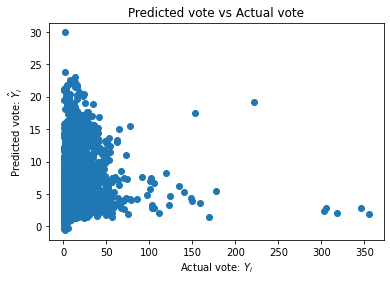

In [11]:
import matplotlib.pyplot as plt
plt.scatter(y_test,y_pred_test_sgd)
plt.xlabel("Actual vote: $Y_i$")
plt.ylabel("Predicted vote: $\hat{Y}_i$")
plt.title("Predicted vote vs Actual vote")
plt.show()